In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
airdata=pd.read_csv("Airbnb_Open_Data.csv",low_memory=False)

In [238]:
airdata.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/21,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/22,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/19,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/18,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [13]:
airdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [17]:
unq_neighborhoodGrp = airdata["neighbourhood group"].unique() #get the unique list of neighborhood group
unq_neighborhoodGrp

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [35]:
airdata[airdata["neighbourhood group"].isnull()] #list all the NAN dataset


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
74,1042206,"HARLEM, NEW YORK WELCOMES YOU!!",98195975718,NaN,Violet,NaN,Washington Heights,40.83139,-73.94095,United States,...,$114,2.0,49.0,6/18/19,1.60,2.0,2.0,NaN,The usual courtesies apply: - No smoking - No ...,NaN
75,1042759,BLUE TRIM GUEST HOUSE,4726877402,unconfirmed,Audrey,NaN,Clinton Hill,40.68346,-73.96374,United States,...,$80,2.0,105.0,6/26/19,0.92,1.0,1.0,NaN,Shoes off please Cat can go in or out as he de...,NaN
76,1043311,Charming East Village One Bedroom Flat,74322993447,verified,Violet,NaN,East Village,40.72828,-73.98801,United States,...,$124,5.0,21.0,1/2/19,0.20,4.0,1.0,NaN,no smoking quiet,NaN
77,1043863,Manhattan Room,11468499446,verified,Sofia,NaN,Upper East Side,40.76865,-73.95058,United States,...,$23,1.0,142.0,7/6/19,1.50,4.0,1.0,NaN,I'm a semi kosher vegetarian which means that ...,NaN
78,1044415,Little King of Queens,68599531533,unconfirmed,Melanie,NaN,Woodside,40.75038,-73.90334,United States,...,$11,30.0,25.0,NaN,0.22,2.0,1.0,NaN,No Street Shoes allowed in House. No cooking K...,NaN
90,1051043,Cozy Bedroom in Williamsburg 3 BR,14067827221,unconfirmed,Lilianna,NaN,Williamsburg,40.71156,-73.96218,United States,...,$53,3.0,174.0,6/22/19,1.54,5.0,4.0,NaN,Dryer and Washing Machine are in Basement (1.0...,NaN
91,1051595,Sunny room+Pvte office in huge loft,12884105458,NaN,Albert,NaN,Bushwick,40.70032,-73.93830,United States,...,$146,4.0,24.0,NaN,0.28,5.0,1.0,NaN,"To enjoy, relax, feel safe and cozy. Also, kee...",NaN
92,1052148,Spacious Prospect Heights Apartment,63218812094,unconfirmed,Sarah,NaN,Prospect Heights,40.68233,-73.97261,United States,...,$117,4.0,166.0,6/27/19,3.40,2.0,1.0,NaN,We ask that guests be respectful as there are ...,NaN
148,1083076,NYC Zen,83696952551,verified,Amelia,NaN,East Village,40.72354,-73.98295,United States,...,$119,3.0,30.0,6/17/19,0.28,5.0,1.0,344.0,No Smoking No Pets No Parties,NaN
161,1090256,Indie-Chic Share In Williamsburg,1595619477,unconfirmed,Darcy,NaN,Williamsburg,40.71088,-73.95055,NaN,...,$204,4.0,202.0,5/28/19,1.86,5.0,2.0,377.0,"No smoking in the apartment, even with the win...",NaN


In [39]:
airdata["neighbourhood group"].isnull().count()
airdata["neighbourhood group"].isnull().sum()

29

In [119]:
dis_area = airdata["neighbourhood group"].value_counts(dropna=False) #to get the count of the col neighborhood group 
#dropna will add to the list all NAN values
dis_area

neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
NaN                 29
brookln              1
manhatan             1
Name: count, dtype: int64

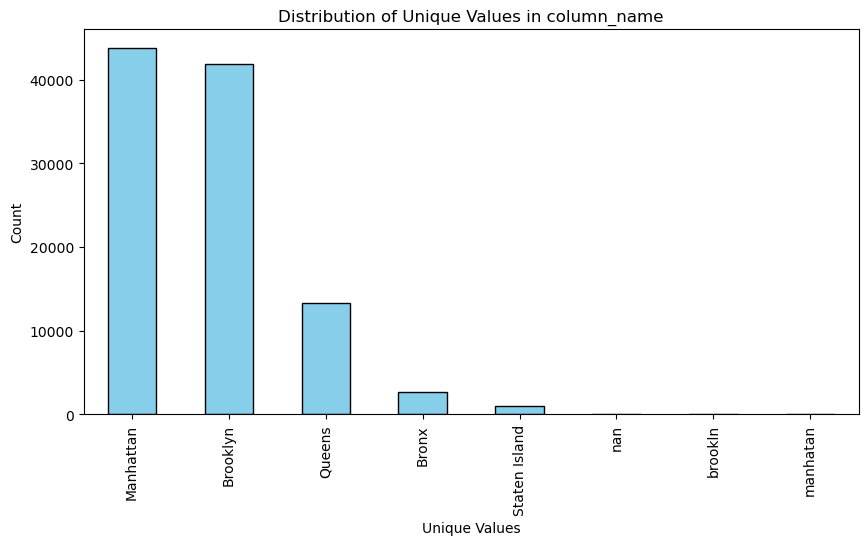

In [121]:
# Plot bar chart --> can be drawn using a series 
plt.figure(figsize=(10, 5))
dis_area.plot(kind="bar", color="skyblue", edgecolor="black")

plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.title("Distribution of Unique Values in column_name")
#plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

#the airdata["neighbourhood group"] is a series, which need to be converted to a dataframe before using to plot using seaborn (as seaborn uses dataframe
1. convert the NAN to "missing values" as we need to view that info in the plot too --> fillna()
2. count the values of all the neighbourhood groups --> value_counts()
3. reset the index --> so that the series is converted to datframe and the values wont be chnage?

In [135]:

dis_area_sns = airdata["neighbourhood group"].fillna("Missing_Values").value_counts(dropna=False).reset_index()
dis_area_sns.columns = ["Unique Values", "Count"]
dis_area_sns

,Unique Values,Count
0,Manhattan,43792
1,Brooklyn,41842
2,Queens,13267
3,Bronx,2712
4,Staten Island,955
5,Missing_Values,29
6,brookln,1
7,manhatan,1


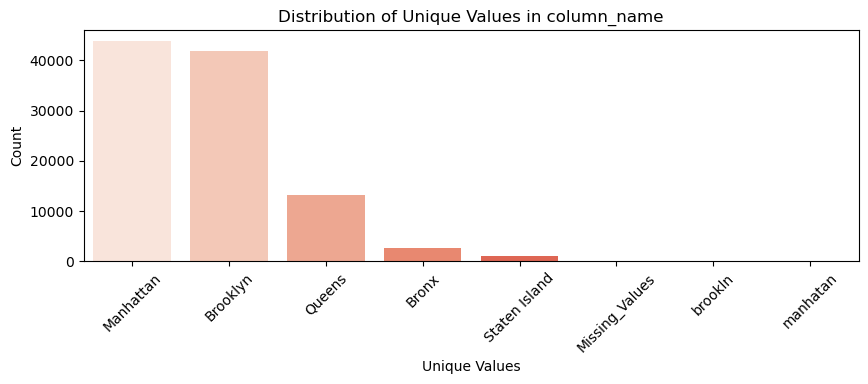

In [145]:

# Plot using Seaborn
plt.figure(figsize=(10, 3))
sns.barplot(x="Unique Values", y="Count", hue="Unique Values", data=dis_area_sns, palette="Reds", legend=False)
plt.xlabel("Unique Values")
plt.ylabel("Count")
plt.title("Distribution of Unique Values in column_name")
plt.xticks(rotation=45)
plt.show()

1. change the NAN values in actual dataset -->airdata
2. Fix incorrect names of brookln & brookln


   To forcast what type of rating each area will get
   neighbourhood group ,neighborhood,country code, const year, price,numb of reviews,review rate

 clean_data = airdata["host name" ,"neighbourhood group","neighbourhood","country code", "Construction year","price","service fee","minimum nights","number of reviews","review rate number"]

In [176]:
 clean_data = airdata[["host name", "neighbourhood group", "neighbourhood", "country code", 
                "Construction year", "price", "service fee", "minimum nights", 
                "number of reviews", "review rate number"]]
clean_data.head()

,host name,neighbourhood group,neighbourhood,country code,Construction year,price,service fee,minimum nights,number of reviews,review rate number
0,Madaline,Brooklyn,Kensington,US,2020.0,$966,$193,10.0,9.0,4.0
1,Jenna,Manhattan,Midtown,US,2007.0,$142,$28,30.0,45.0,4.0
2,Elise,Manhattan,Harlem,US,2005.0,$620,$124,3.0,0.0,5.0
3,Garry,Brooklyn,Clinton Hill,US,2005.0,$368,$74,30.0,270.0,4.0
4,Lyndon,Manhattan,East Harlem,US,2009.0,$204,$41,10.0,9.0,3.0


In [180]:
clean_data = clean_data.rename(columns={
    "review rate number": "Rating",
    "host name": "HostName",
    "neighbourhood group":"Place"
    
})
clean_data.head()

,HostName,Place,neighbourhood,country code,Construction year,price,service fee,minimum nights,number of reviews,Rating
0,Madaline,Brooklyn,Kensington,US,2020.0,$966,$193,10.0,9.0,4.0
1,Jenna,Manhattan,Midtown,US,2007.0,$142,$28,30.0,45.0,4.0
2,Elise,Manhattan,Harlem,US,2005.0,$620,$124,3.0,0.0,5.0
3,Garry,Brooklyn,Clinton Hill,US,2005.0,$368,$74,30.0,270.0,4.0
4,Lyndon,Manhattan,East Harlem,US,2009.0,$204,$41,10.0,9.0,3.0


In [186]:
clean_data["Place"] = clean_data["Place"].fillna("Missing_Values")
clean_data["Place"].value_counts(dropna=False) 

Place
Manhattan         43792
Brooklyn          41842
Queens            13267
Bronx              2712
Staten Island       955
Missing_Values       29
brookln               1
manhatan              1
Name: count, dtype: int64

In [188]:
clean_data["Place"] = clean_data["Place"].replace({"brookln": "Brooklyn", "manhatan": "Manhattan"}) #replacing the data correctly
clean_data["Place"].value_counts(dropna=False) 

Place
Manhattan         43793
Brooklyn          41843
Queens            13267
Bronx              2712
Staten Island       955
Missing_Values       29
Name: count, dtype: int64

In [190]:
clean_data.head()

,HostName,Place,neighbourhood,country code,Construction year,price,service fee,minimum nights,number of reviews,Rating
0,Madaline,Brooklyn,Kensington,US,2020.0,$966,$193,10.0,9.0,4.0
1,Jenna,Manhattan,Midtown,US,2007.0,$142,$28,30.0,45.0,4.0
2,Elise,Manhattan,Harlem,US,2005.0,$620,$124,3.0,0.0,5.0
3,Garry,Brooklyn,Clinton Hill,US,2005.0,$368,$74,30.0,270.0,4.0
4,Lyndon,Manhattan,East Harlem,US,2009.0,$204,$41,10.0,9.0,3.0


In [206]:
# Group by 'Place' and find the minimum rating
min_ratings = clean_data.groupby("Place")["Rating"].min().reset_index()

# Count occurrences of each minimum rating per place
rating_counts = clean_data.groupby(["Place", "Rating"]).size().reset_index(name="counts")

# Merge both DataFrames to get the final result
min_ratings = min_ratings.merge(rating_counts, on=["Place", "Rating"], how="left")

# Display the result
print(min_ratings)


            Place  Rating  counts
0           Bronx     1.0     165
1        Brooklyn     1.0    4023
2       Manhattan     1.0    4041
3  Missing_Values     1.0       5
4          Queens     1.0     924
5   Staten Island     1.0      54


In [198]:
#max_ratings = clean_data.groupby("Place")["Rating"].max().reset_index()
#max_ratings.columns = ["Place", "Minimum Rating"]
#max_ratings

,Place,Minimum Rating
0,Bronx,5.0
1,Brooklyn,5.0
2,Manhattan,5.0
3,Missing_Values,5.0
4,Queens,5.0
5,Staten Island,5.0


In [230]:
df = airdata["neighbourhood group"].value_counts()
df

neighbourhood group
Manhattan        43792
Brooklyn         41842
Queens           13267
Bronx             2712
Staten Island      955
brookln              1
manhatan             1
Name: count, dtype: int64

In [240]:
airdata=airdata.dropna()

In [242]:
airdata

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
11114,7139598,"Cozy 1 BR on Bedford Avenue, Wburg",73023181304,verified,Christina,Brooklyn,Williamsburg,40.71764,-73.95689,United States,...,$140,1.0,1.0,1/3/16,0.02,1.0,1.0,191.0,"Dear Guest, Thank you for appreciating that I ...",41662/AL


In [262]:
clean_data.head()

,HostName,Place,neighbourhood,country code,Construction year,price,service fee,minimum nights,number of reviews,Rating
0,Madaline,Brooklyn,Kensington,US,2020.0,$966,$193,10.0,9.0,4.0
1,Jenna,Manhattan,Midtown,US,2007.0,$142,$28,30.0,45.0,4.0
2,Elise,Manhattan,Harlem,US,2005.0,$620,$124,3.0,0.0,5.0
3,Garry,Brooklyn,Clinton Hill,US,2005.0,$368,$74,30.0,270.0,4.0
4,Lyndon,Manhattan,East Harlem,US,2009.0,$204,$41,10.0,9.0,3.0


In [252]:
grouped_df = clean_data.groupby("Place").agg({"Rating": "mean", "price": "sum"})

print(type(grouped_df))  # Output: <class 'pandas.core.frame.DataFrame'>
print(grouped_df)


<class 'pandas.core.frame.DataFrame'>
                  Rating                                              price
Place                                                                      
Bronx           3.333210  $483 $538 $643 $55 $811 $101 $73 $581 $361 $64...
Brooklyn        3.259077  $966 $368 $71 $1,060 $580 $778 $656 $1,095 $47...
Manhattan       3.276593  $142 $620 $204 $577 $1,018 $291 $319 $606 $714...
Missing_Values  3.222222  $571 $398 $618 $116 $54 $266 $728 $583 $1,020 ...
Queens          3.330587  $916 $606 $355 $724 $1,084 $938 $405 $907 $1,1...
Staten Island   3.405690  $1,015 $725 $784 $593 $1,032 $629 $675 $459 $1...


In [260]:
grouped_df2 = clean_data.groupby("Place").agg({"Rating": "mean", "price": "sum"}).reset_index()
 # Output: <class 'pandas.core.frame.DataFrame'>
grouped_df2

,Place,Rating,price
0,Bronx,3.333210,$483 $538 $643 $55 $811 $101 $73 $581 $361 $64...
1,Brooklyn,3.259077,"$966 $368 $71 $1,060 $580 $778 $656 $1,095 $47..."
2,Manhattan,3.276593,"$142 $620 $204 $577 $1,018 $291 $319 $606 $714..."
3,Missing_Values,3.222222,"$571 $398 $618 $116 $54 $266 $728 $583 $1,020 ..."
4,Queens,3.330587,"$916 $606 $355 $724 $1,084 $938 $405 $907 $1,1..."
5,Staten Island,3.405690,"$1,015 $725 $784 $593 $1,032 $629 $675 $459 $1..."


In [258]:
type(grouped_df2)

pandas.core.frame.DataFrame

In [266]:
df3 =clean_data.groupby("Place")["Rating"].mean()
df3

Place
Bronx             3.333210
Brooklyn          3.259077
Manhattan         3.276593
Missing_Values    3.222222
Queens            3.330587
Staten Island     3.405690
Name: Rating, dtype: float64

In [264]:
asindexdf =clean_data.groupby("Place", as_index=False)["Rating"].mean()
asindexdf

,Place,Rating
0,Bronx,3.333210
1,Brooklyn,3.259077
2,Manhattan,3.276593
3,Missing_Values,3.222222
4,Queens,3.330587
5,Staten Island,3.405690


In [268]:
resetindexdf =clean_data.groupby("Place")["Rating"].mean().reset_index()
resetindexdf

,Place,Rating
0,Bronx,3.333210
1,Brooklyn,3.259077
2,Manhattan,3.276593
3,Missing_Values,3.222222
4,Queens,3.330587
5,Staten Island,3.405690
